In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

XỬ LÝ DỮ LIỆU BỊ TRÙNG

In [2]:
df = pd.read_csv('./WorldCupShootouts.csv')
check_loop = df.duplicated()
print(df[check_loop])


Empty DataFrame
Columns: [Game_id, Team, Zone, Foot, Keeper, OnTarget, Goal, Penalty_Number, Elimination]
Index: []


THỐNG KÊ DỮ LIỆU

In [3]:
print(df.describe())

          Game_id        Zone    OnTarget        Goal  Penalty_Number  \
count  320.000000  320.000000  320.000000  320.000000      320.000000   
mean    17.606250    5.681250    0.912500    0.690625        5.146875   
std     10.160528    2.501089    0.283009    0.462960        2.757774   
min      1.000000    1.000000    0.000000    0.000000        1.000000   
25%      9.000000    4.000000    1.000000    0.000000        3.000000   
50%     17.500000    6.000000    1.000000    1.000000        5.000000   
75%     26.250000    7.000000    1.000000    1.000000        7.000000   
max     35.000000    9.000000    1.000000    1.000000       12.000000   

       Elimination  
count   320.000000  
mean      0.128125  
std       0.334752  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


XỬ LÝ DỮ LIỆU BỊ THIẾU

In [4]:
print("Số lượng giá trị bị thiếu trong cột :")
print(df.isnull().sum())
print(df)

Số lượng giá trị bị thiếu trong cột :
Game_id           0
Team              0
Zone              0
Foot              0
Keeper            0
OnTarget          0
Goal              0
Penalty_Number    0
Elimination       0
dtype: int64
     Game_id Team  Zone Foot Keeper  OnTarget  Goal  Penalty_Number  \
0          1  FRA     7    R      R         1     1               1   
1          1  GER     9    R      C         1     1               2   
2          1  FRA     6    R      L         1     1               3   
3          1  GER     2    R      C         1     1               4   
4          1  FRA     9    R      L         1     1               5   
..       ...  ...   ...  ...    ...       ...   ...             ...   
315       35  ARG     8    L      R         1     1               4   
316       35  FRA     7    R      L         0     0               5   
317       35  ARG     7    R      L         1     1               6   
318       35  FRA     2    R      L         1     1        

HIỂN THỊ CỘT TÙY CHỌN

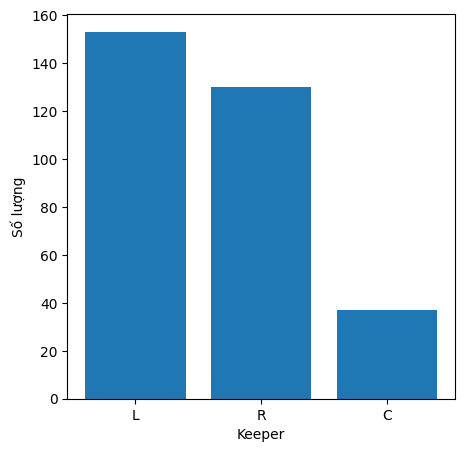

In [5]:
column_name = 'Keeper'
value_counts = df[column_name].value_counts()
value_counts = value_counts.sort_values(ascending=False)
plt.figure(figsize=(5,5))
# Vẽ biểu đồ 
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(column_name)
plt.ylabel('Số lượng')
plt.show()



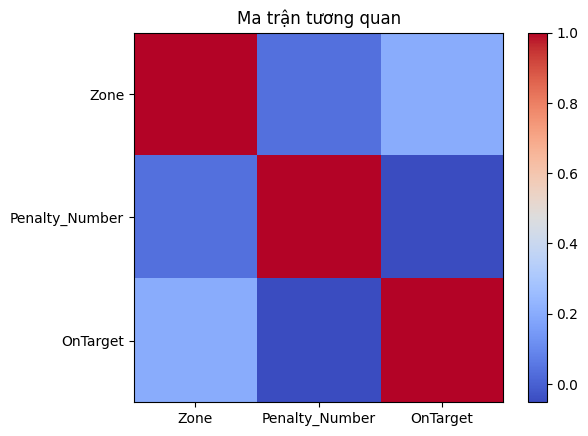

In [6]:

var1 = df['Zone']
var2 = df['Penalty_Number']
var3 = df['OnTarget']
correlation_matrix = np.corrcoef([var1, var2, var3])
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(3), ['Zone', 'Penalty_Number', 'OnTarget'])
plt.yticks(np.arange(3), ['Zone', 'Penalty_Number', 'OnTarget'])
plt.title('Ma trận tương quan')
plt.show()

CHUẢN HÓA DỮ LIỆU

In [7]:

def normalize_and_save_data(input_file_path, output_file_path): # hàm chuẩn hóa dữ liệu
    with open(input_file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader) 
        data = []
        for row in reader:
            game_id = int(row[0])
            team = row[1]
            zone = int(row[2])
            foot = row[3]
            keeper = row[4]
            on_target = int(row[5])
            goal = int(row[6])
            penalty_number = int(row[7])
            elimination = int(row[8])

            data.append([game_id, zone, on_target, goal, penalty_number, elimination])

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    with open(output_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)  # Ghi tiêu đề cột

        for i in range(len(normalized_data)):
            row_data = normalized_data[i]
            writer.writerow([data[i][0]] + row_data.tolist())  # Ghi game_id và dữ liệu chuẩn hóa

    print("Dữ liệu đã được chuẩn hóa và ghi vào file:", output_file_path)

input_file_path = 'WorldCupShootouts.csv'
output_file_path = 'NormalizedWorldCupShootouts.csv'

normalize_and_save_data(input_file_path, output_file_path)

Dữ liệu đã được chuẩn hóa và ghi vào file: NormalizedWorldCupShootouts.csv


chuẩn hóa dữ liệu để sử dụng cho cây nhị phân

In [8]:

data = pd.read_csv('WorldCupShootouts.csv')
columns_to_scale = ['Zone', 'OnTarget', 'Goal']# Lấy cột 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
data[columns_to_scale] = scaled_df
data.to_csv('WorldCupShootouts_scaled.csv', index=False)

thống kê mô tả

          Game_id          Zone      OnTarget          Goal  Penalty_Number  \
count  320.000000  3.200000e+02  3.200000e+02  3.200000e+02      320.000000   
mean    17.606250 -1.776357e-16  6.661338e-17 -1.054712e-16        5.146875   
std     10.160528  1.001566e+00  1.001566e+00  1.001566e+00        2.757774   
min      1.000000 -1.874616e+00 -3.229330e+00 -1.494096e+00        1.000000   
25%      9.000000 -6.732600e-01  3.096618e-01 -1.494096e+00        3.000000   
50%     17.500000  1.276441e-01  3.096618e-01  6.693010e-01        5.000000   
75%     26.250000  5.280961e-01  3.096618e-01  6.693010e-01        7.000000   
max     35.000000  1.329000e+00  3.096618e-01  6.693010e-01       12.000000   

       Elimination  
count   320.000000  
mean      0.128125  
std       0.334752  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


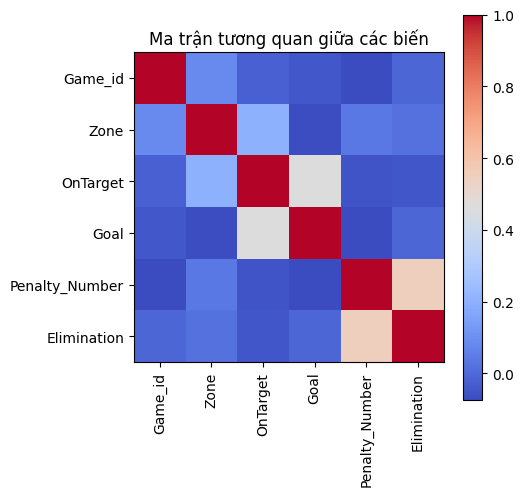

In [9]:
numeric_columns = data.select_dtypes(include=[float, int]).columns
numeric_data = data[numeric_columns]
print(numeric_data.describe())
correlation = numeric_data.corr()
plt.figure(figsize=(5, 5))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

HEATMAP

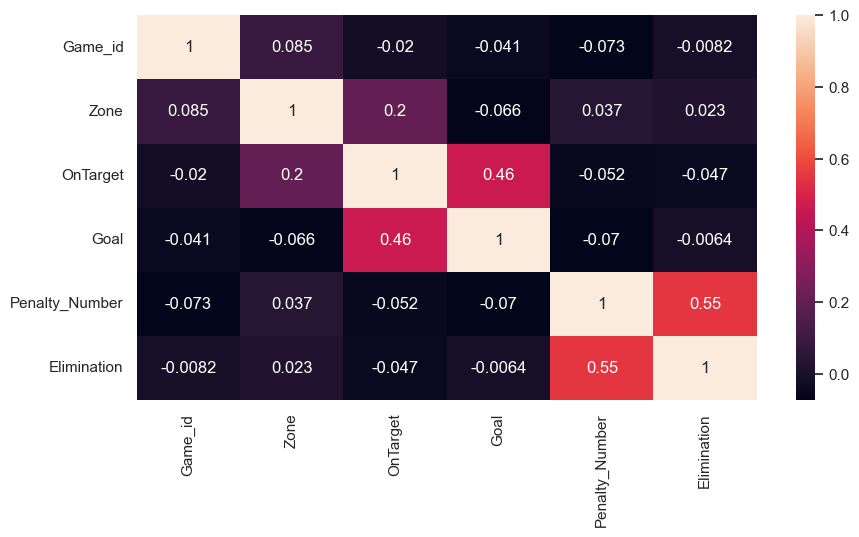

In [10]:
nc = df.select_dtypes(include=[float,int]).columns
df_new = df[nc]
corr_matrix = df_new.corr()
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


thực hiện thuật toán random

trả lời cho câu hỏi, những yếu tố nào ảnh hưởng tới khả năng ghi bàn của một cầu thủ

In [11]:
data = pd.read_csv('./NormalizedWorldCupShootouts.csv')
feature = data[['Zone','Foot','Keeper','OnTarget']]
labels = data['Goal'] 
X_train, X_test, y_train, y_test =  train_test_split(feature, labels, test_size=0.2, random_state=10)

rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
pred = rf1.predict(X_test)
accuracy1= accuracy_score(y_test,pred)
print("độ chính xác của randomforest: ",accuracy1)

rf = LogisticRegression()
rf.fit(X_train,y_train)
preditions = rf.predict(X_test)
accuracy = accuracy_score(y_test,preditions)


print("độ chính xác logistic regresstion  : ",accuracy)
print("đánh giá report: ")
print("kết quả logistic regresstion: ") 
print(classification_report(y_test,preditions))
print("kết quả random forest : ")
print(classification_report(y_test,pred))


độ chính xác của randomforest:  0.921875
độ chính xác logistic regresstion  :  0.890625
đánh giá report: 
kết quả logistic regresstion: 
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        57
         1.0       0.00      0.00      0.00         7

    accuracy                           0.89        64
   macro avg       0.45      0.50      0.47        64
weighted avg       0.79      0.89      0.84        64

kết quả random forest : 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        57
         1.0       0.67      0.57      0.62         7

    accuracy                           0.92        64
   macro avg       0.81      0.77      0.79        64
weighted avg       0.92      0.92      0.92        64



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif